### Import necessary libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load MNIST data

In [59]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Dataset shape

In [63]:
print(f"Train Images shape = {train_images.shape}")
print(f"Train Labels shape = {train_labels.shape}")
print(f"Test Images shape  = {test_images.shape}")
print(f"Test Labels shape  = {test_labels.shape}")

Train Images shape = (60000, 28, 28)
Train Labels shape = (60000,)
Test Images shape  = (10000, 28, 28)
Test Labels shape  = (10000,)


### Function to Display Images

In [64]:
def display_images(images, labels):
    plt.figure(figsize=(7, 5))

    total = len(labels)
    for i in range(total):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

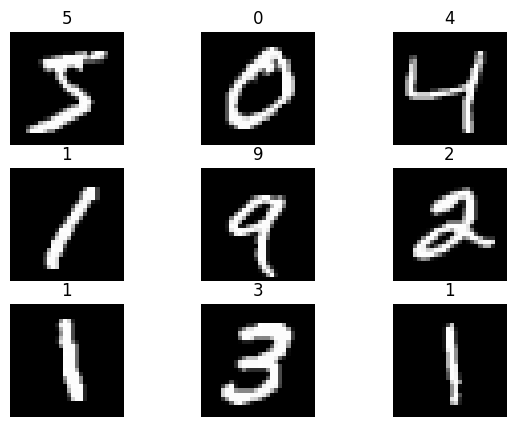

In [65]:
display_images(train_images[:9], train_labels[:9])

### Preprocess data

In [70]:
x_train = train_images / 255.0
x_test = test_images / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)


In [68]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Processed Dataset Shape

In [81]:
print(f"X_Train shape = {x_train.shape}")
print(f"Y-Train shape = {y_train.shape}")
print(f"X-Test shape  = {x_test.shape}")
print(f"Y-Test shape  = {y_test.shape}")

X_Train shape = (60000, 28, 28, 1)
Y-Train shape = (60000, 10)
X-Test shape  = (10000, 28, 28, 1)
Y-Test shape  = (10000, 10)


### Function to perform Data Augmentation

In [86]:
def perform_augmentation(org_images, org_labels):

    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
    )

    datagen.fit(org_images)

    augmented_data_gen = datagen.flow(org_images, org_labels, batch_size=50, shuffle=False)
    augmented_images, augmented_labels = next(augmented_data_gen)

    for i in range(1, int(np.ceil(len(org_images) / 50))):
        images, labels = next(augmented_data_gen)
        augmented_images = np.concatenate((augmented_images, images), axis=0)
        augmented_labels = np.concatenate((augmented_labels, labels), axis=0)
    
    augmented_images = np.concatenate((org_images, augmented_images), axis=0)
    augmented_labels = np.concatenate((org_labels, augmented_labels), axis=0)

    return augmented_images, augmented_labels

### Augmanting the Train and Test set

In [87]:
aug_x_train, aug_y_train = perform_augmentation(x_train, y_train)
aug_x_test, aug_y_test = perform_augmentation(x_test, y_test)

### Augmented Test and Train set shape

In [88]:
print(f"Augmented X_Train shape = {aug_x_train.shape}")
print(f"Augmented Y-Train shape = {aug_y_train.shape}")
print(f"Augmented X-Test shape  = {aug_x_test.shape}")
print(f"Augmented Y-Test shape  = {aug_y_test.shape}")

Augmented X_Train shape = (120000, 28, 28, 1)
Augmented Y-Train shape = (120000, 10)
Augmented X-Test shape  = (20000, 28, 28, 1)
Augmented Y-Test shape  = (20000, 10)


### Function to generate cnn model

In [89]:
def cnn_model(input_shape, classifier):

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((3, 3), strides=(1, 1)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(1, 1)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(classifier, activation='softmax'))
    
    return model

### Model

In [104]:
input_shape = x_train[0].shape
# print(input_shape)

model_original = cnn_model(input_shape, 10)
model_original.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_original.summary()


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,930 (6.32 MB)

 Trainable params: 1,657,930 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

### Training the original Model

In [105]:
history_original = model_original.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.8528 - loss: 0.5493 - val_accuracy: 0.9778 - val_loss: 0.0717
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9768 - loss: 0.0773 - val_accuracy: 0.9813 - val_loss: 0.0605
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9837 - loss: 0.0562 - val_accuracy: 0.9866 - val_loss: 0.0428


In [106]:
model_augmented = cnn_model(input_shape, 10)
model_augmented.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_augmented = model_augmented.fit(aug_x_train, aug_y_train, epochs=2, batch_size=64, validation_data=(aug_x_test, aug_y_test))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.8583 - loss: 0.4815 - val_accuracy: 0.9694 - val_loss: 0.1040
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9688 - loss: 0.1030 - val_accuracy: 0.9681 - val_loss: 0.0999


### Plot training history

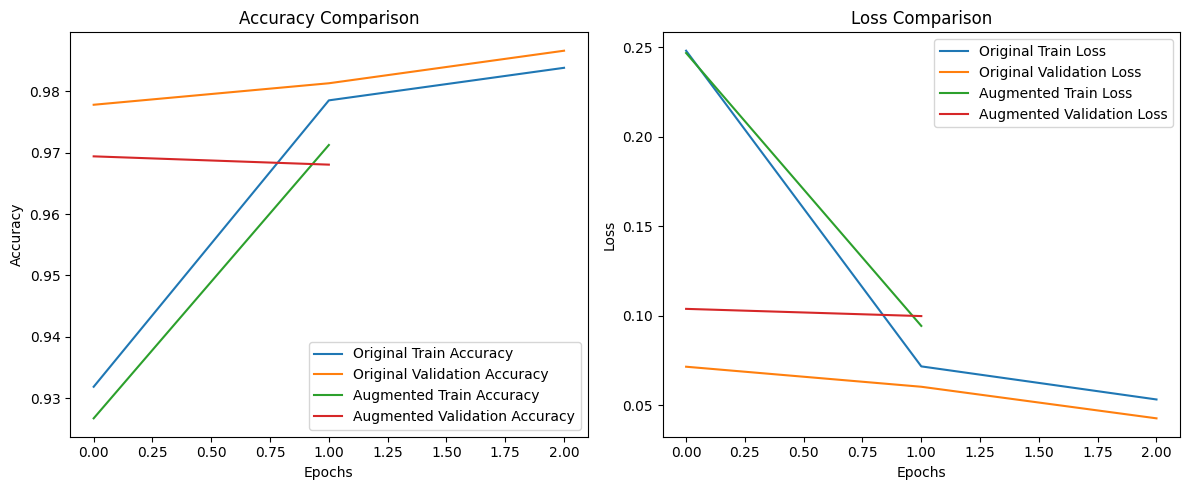

In [107]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Train Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.plot(history_original.history['loss'], label='Original Train Loss')
plt.plot(history_original.history['val_loss'], label='Original Validation Loss')
plt.plot(history_augmented.history['loss'], label='Augmented Train Loss')
plt.plot(history_augmented.history['val_loss'], label='Augmented Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

plt.tight_layout()
plt.show()

### Testing original and augmented test set on Original Model Train

In [109]:
test_loss_orginal, test_accuracy_original = model_original.evaluate(x_test, y_test)
test_loss_augmented, test_accuracy_augmented = model_original.evaluate(aug_x_test, aug_y_test)

print(f'Original Test Accuracy: {test_accuracy_original:.4f}')
print(f'Augmented Test Accuracy: {test_accuracy_augmented:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9837 - loss: 0.0531
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9652 - loss: 0.1144
Original Test Accuracy: 0.9866
Augmented Test Accuracy: 0.9255


### Testing original and augmented test set on Augmented Model Train

In [110]:
test_loss_orginal, test_accuracy_original = model_augmented.evaluate(x_test, y_test)
test_loss_augmented, test_accuracy_augmented = model_augmented.evaluate(aug_x_test, aug_y_test)

print(f'Original Test Accuracy: {test_accuracy_original:.4f}')
print(f'Augmented Test Accuracy: {test_accuracy_augmented:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9795 - loss: 0.0598
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9759 - loss: 0.0733
Original Test Accuracy: 0.9849
Augmented Test Accuracy: 0.9681
